<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp24-notes/blob/main/Day15_Loss_Surface_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day15
## Loss Surface and Gradient Descent

#### CS167: Machine Learning, Spring 2024

Thursday, March 28, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_syllabus_sp24.pdf)

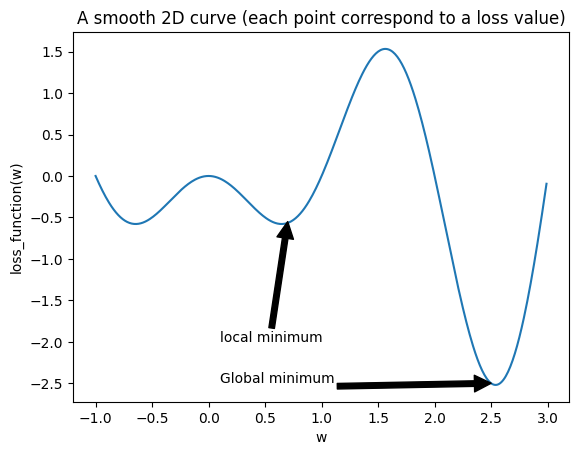

In [1]:
# Plot local minimum and maximum in 1d
# Reference: Probabilistic Machine Learning - Kevin Murphy

import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
import os
from matplotlib import colors as mcolors

def generate_curve(w):
    return w * np.sin(-np.pi * w)

w = np.arange(-1, 3, 0.01)
plt.annotate("local minimum", xy=(0.7, -0.55), xytext=(0.1, -2.0), arrowprops=dict(facecolor="black"))
plt.annotate("Global minimum", xy=(2.5, -2.5), xytext=(0.1, -2.5), arrowprops=dict(facecolor="black"))
plt.xlabel('w')
plt.ylabel('loss_function(w)')
plt.title('A smooth 2D curve (each point correspond to a loss value)')
plt.plot(w, generate_curve(w))
plt.show()

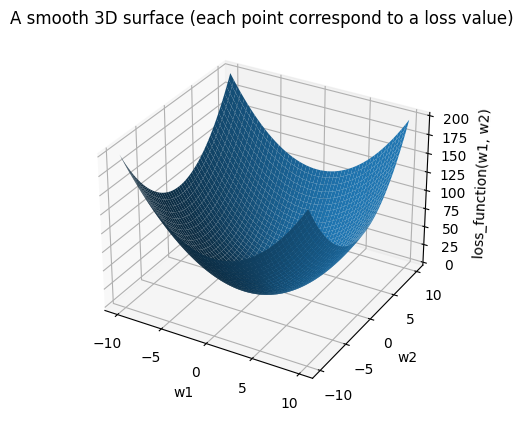

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_surface(x, y):
  a = 0
  b = 0
  loss_value = (x+a)**2 + (y+b)**2
  return loss_value


fig = plt.figure()

ax  = fig.add_subplot(111, projection='3d')
x   = np.arange(-10.0, 10.0, 0.05)
y   = np.arange(-10.0, 10.0, 0.05)
X, Y = np.meshgrid(x, y)


loss_values = generate_surface(np.ravel(X), np.ravel(Y))
loss_values = np.array( loss_values )
Z = loss_values.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel(' loss_function(w1, w2) ')
plt.title('A smooth 3D surface (each point correspond to a loss value)')
plt.show()

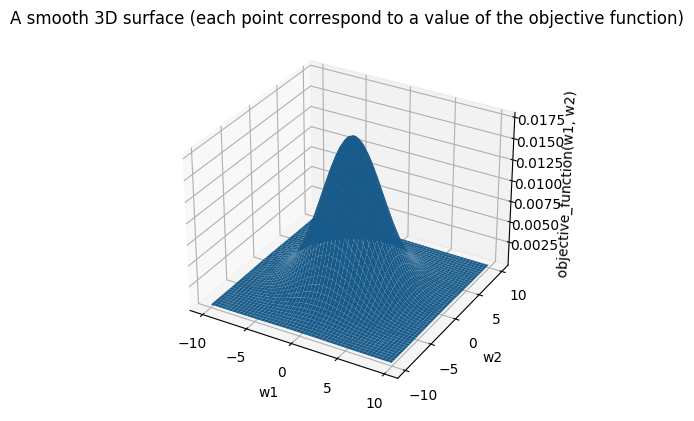

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_surface(x, y):
  mu_x = 0
  mu_y = 0
  sigma_x = 3
  sigma_y = 3

  loss_value = np.exp(-(x-mu_x)**2/(2*sigma_x**2) -(y-mu_y)**2/(2*sigma_y**2))/(2*np.pi*sigma_y*sigma_y)
  return loss_value

fig = plt.figure()

ax  = fig.add_subplot(111, projection='3d')
x   = np.arange(-10.0, 10.0, 0.05)
y   = np.arange(-10.0, 10.0, 0.05)
X, Y = np.meshgrid(x, y)


loss_values = generate_surface(np.ravel(X), np.ravel(Y))
loss_values = np.array( loss_values )
Z = loss_values.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel(' objective_function(w1, w2) ')
plt.title('A smooth 3D surface (each point correspond to a value of the objective function)')
plt.show()

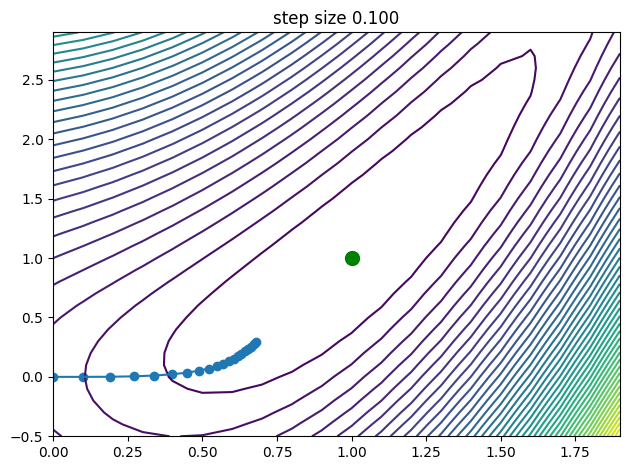

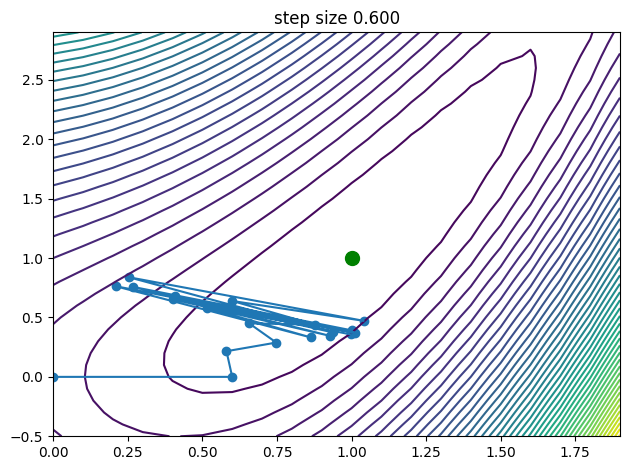

In [ ]:
# Author: Meduri Venkata Shivaditya
# Reference: from textbook "Probabilistic Machine Learning - Kevin Murphy"
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, line_search


def aoki_vectorized(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[:][0]) - x[:][1]) + 0.5 * np.square(x[:][0] - 1)
    return f


def aoki(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[0]) - x[1]) + 0.5 * np.square(x[0] - 1)
    return f


def aoki_gd(x):
    """
    First-Order derivative of aoki function(Nabia - 1)
    """
    g_x = 2 * np.dot((np.square(x[0]) - x[1]), x[0]) + x[0] - 1
    g_y = -1 * (np.square(x[0]) - x[1])
    return np.array((g_x, g_y))


def gradient_descent(x0, f, f_prime, stepsize=None):
    """
    Steepest Gradient-Descent algorithm
    """
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))

        step = stepsize
        x_i += -step * dx_i
        y_i += -step * dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i


def main():
    x1 = np.arange(0, 2, 0.1)
    x2 = np.arange(-0.5, 3, 0.1)
    x = np.meshgrid(x1, x2)
    z = aoki_vectorized(np.array(x))

    step_sizes = [0.1, 0.6]
    for i, step in enumerate(step_sizes):
        plt.contour(x1, x2, z, 50)
        plt.plot(1, 1, "go", markersize=10)
        x0 = np.array((0.0, 0.0))

        #xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=step)
        xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, stepsize=step)
        ttl = "step size {:0.3f}".format(step)

        nsteps = 20
        plt.scatter(xs[:nsteps], ys[:nsteps])
        plt.plot(xs[:nsteps], ys[:nsteps])
        plt.title(ttl)
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    main()

